In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# define your paths here

x_train_path = '../data/raw/train/diabetes-features-train.csv'
x_test_path = '../data/raw/test/diabetes-features-test.csv'
x_val_path = '../data/raw/validation/diabetes-features-validation.csv'

y_train_path = '../data/raw/train/diabetes-labels-train.csv'
y_val_path = '../data/raw/validation/diabetes-features-validation.csv'


In [3]:
# load all the available files

X_train = pd.read_csv(x_train_path, index_col=0)
X_test = pd.read_csv(x_test_path, index_col=0)
X_val = pd.read_csv(x_val_path, index_col=0)

y_train = pd.read_csv(y_train_path, index_col=0)
y_val = pd.read_csv(y_val_path, index_col=0)


In [4]:
# have a first look
X_train.head()


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,27.20,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
1,0.0,0.0,1.0,36.61,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,3.0,0.0,0.0,4.0,5.0,8.0
2,1.0,0.0,1.0,24.19,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,2.0,0.0,1.0,0.0,0.0,8.0,5.0,NaN
3,1.0,0.0,1.0,34.33,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,5.0,4.0
4,0.0,NaN,0.0,22.81,0.0,0.0,0.0,NaN,NaN,NaN,...,1.0,1.0,NaN,0.0,0.0,0.0,0.0,1.0,5.0,6.0


In [5]:
# have a first look
y_train.head()

,Diabetes_binary
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0


In [6]:
# check for data balance
y_train.value_counts('Diabetes_binary')


Diabetes_binary
0.0    289606
1.0     43530
Name: count, dtype: int64

In [7]:
# Joining X_train and y_train together
train_data = pd.concat([X_train, y_train], axis=1)


In [8]:

# Basic statistics
print(train_data.describe())

# Target variable distribution
print(train_data['Diabetes_binary'].value_counts(normalize=True))

              HighBP       HighChol      CholCheck            BMI  \
count  332175.000000  285936.000000  321712.000000  305728.000000   
mean        0.404690       0.422731       0.851830      28.049849   
std         0.490833       0.493994       0.355269       6.668352   
min         0.000000       0.000000       0.000000      12.020000   
25%         0.000000       0.000000       1.000000      23.730000   
50%         0.000000       0.000000       1.000000      26.950000   
75%         1.000000       1.000000       1.000000      30.900000   
max         1.000000       1.000000       1.000000      99.950000   

              Smoker         Stroke  HeartDiseaseorAttack   PhysActivity  \
count  319988.000000  332257.000000         330334.000000  304588.000000   
mean        0.435379       0.041495              0.087802       0.734175   
std         0.495807       0.199432              0.283007       0.441772   
min         0.000000       0.000000              0.000000       0.000000  

In [9]:
# Ensure features and target are separate
print(X_train.head())  
print(y_train.head())  


   HighBP  HighChol  CholCheck    BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0     1.0       1.0        1.0  27.20     0.0     0.0                   0.0   
1     0.0       0.0        1.0  36.61     0.0     0.0                   0.0   
2     1.0       0.0        1.0  24.19     1.0     0.0                   0.0   
3     1.0       0.0        1.0  34.33     0.0     0.0                   0.0   
4     0.0       NaN        0.0  22.81     0.0     0.0                   0.0   

   PhysActivity  Fruits  Veggies  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0           1.0     0.0      0.0  ...            1.0          0.0      3.0   
1           1.0     1.0      1.0  ...            1.0          0.0      2.0   
2           1.0     0.0      0.0  ...            1.0          0.0      2.0   
3           0.0     1.0      1.0  ...            0.0          1.0      3.0   
4           NaN     NaN      NaN  ...            1.0          1.0      NaN   

   MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  In

In [10]:
# Check for missing values in each column
missing_values_train = X_train.isnull().sum()
missing_values_val = X_val.isnull().sum()
missing_values_test = X_test.isnull().sum()
print(missing_values_train, missing_values_val, missing_values_test)

# Percentage of missing values
missing_percentage_train = (missing_values_train / len(X_train)) * 100
missing_percentage_val = (missing_values_val / len(X_train)) * 100
missing_percentage_test = (missing_values_test / len(X_train)) * 100
print(missing_percentage_train, missing_percentage_val, missing_percentage_test)


HighBP                    961
HighChol                47200
CholCheck               11424
BMI                     27408
Smoker                  13148
Stroke                    879
HeartDiseaseorAttack     2802
PhysActivity            28548
Fruits                  32800
Veggies                 38363
HvyAlcoholConsump       19278
AnyHealthcare            1314
NoDocbcCost               883
GenHlth                   930
MentHlth                 5606
PhysHlth                 7326
DiffWalk                10905
Sex                         0
Age                      3990
Education                1327
Income                  59656
dtype: int64 HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth            

In [11]:
# Calculate correlation matrix
correlation_matrix = train_data.corr()
print(correlation_matrix)

                        HighBP  HighChol  CholCheck       BMI    Smoker  \
HighBP                1.000000  0.303808   0.207977  0.209677  0.098241   
HighChol              0.303808  1.000000   0.082236  0.106313  0.092172   
CholCheck             0.207977  0.082236   1.000000  0.076282  0.017823   
BMI                   0.209677  0.106313   0.076282  1.000000  0.018601   
Smoker                0.098241  0.092172   0.017823  0.018601  1.000000   
Stroke                0.141469  0.094731   0.051912  0.020792  0.061845   
HeartDiseaseorAttack  0.217946  0.181635   0.096315  0.057122  0.108687   
PhysActivity         -0.119233 -0.079779   0.022453 -0.132874 -0.084905   
Fruits               -0.022121 -0.039795   0.073205 -0.077024 -0.073940   
Veggies              -0.042747 -0.038905   0.064722 -0.050347 -0.027176   
HvyAlcoholConsump    -0.011640 -0.012467  -0.036362 -0.041711  0.105531   
AnyHealthcare         0.074891  0.043323   0.230290 -0.008945 -0.025375   
NoDocbcCost           0.0

In [12]:
# Count rows with at least one missing value in each class
class_0_missing_rows = train_data[train_data['Diabetes_binary'] == 0].isnull().any(axis=1).sum()
class_1_missing_rows = train_data[train_data['Diabetes_binary'] == 1].isnull().any(axis=1).sum()

print(f"\nTotal rows with missing values:")
print(f"Class 0: {class_0_missing_rows} rows have at least one missing value")
print(f"Class 1: {class_1_missing_rows} rows have at least one missing value")

# Calculate percentages
total_class_0 = len(train_data[train_data['Diabetes_binary'] == 0])
total_class_1 = len(train_data[train_data['Diabetes_binary'] == 1])

print(f"\nPercentages:")
print(f"Class 0: {(class_0_missing_rows/total_class_0)*100:.2f}% of rows have missing values")
print(f"Class 1: {(class_1_missing_rows/total_class_1)*100:.2f}% of rows have missing values")


Total rows with missing values:
Class 0: 124630 rows have at least one missing value
Class 1: 16565 rows have at least one missing value

Percentages:
Class 0: 43.03% of rows have missing values
Class 1: 38.05% of rows have missing values


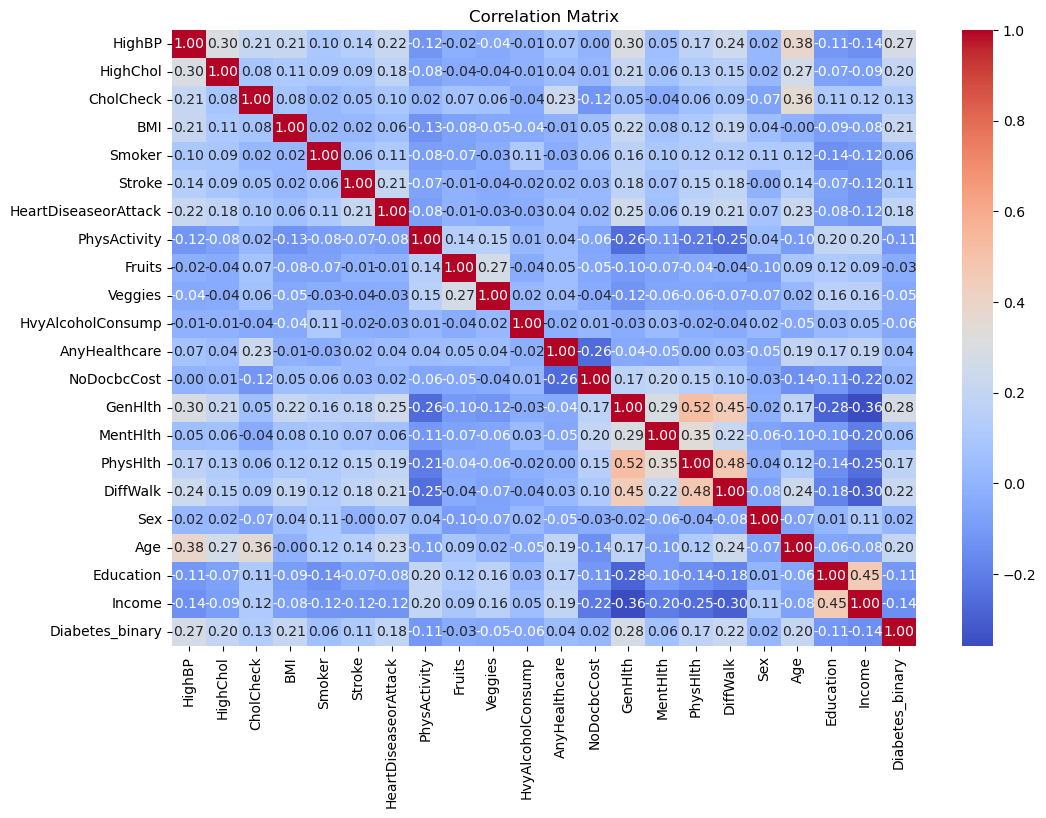

In [13]:

# Plot heatmap to check for Multicolinearity
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()


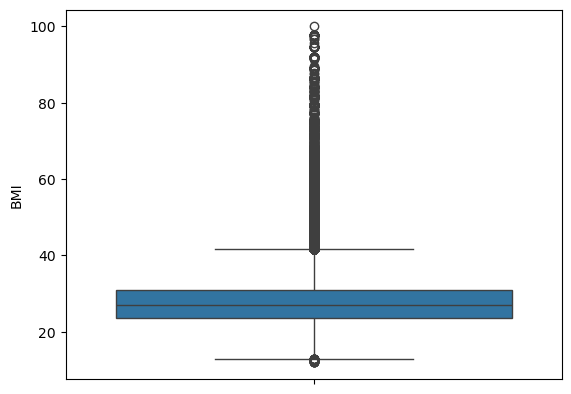

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(X_train['BMI'])
plt.show()


In [15]:
# Calculate Q1, Q3, and IQR for BMI
Q1 = X_train['BMI'].quantile(0.25)
Q3 = X_train['BMI'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")


Lower Bound: 12.975000000000003, Upper Bound: 41.654999999999994


In [16]:
# Checking the highest and lowest values in the BMI column
highest_bmi = X_train['BMI'].max()
lowest_bmi = X_train['BMI'].min()
missing_bmi = X_train['BMI'].isnull().sum()

print(f"Highest BMI: {highest_bmi}")
print(f"Lowest BMI: {lowest_bmi}")
print(f"Number of Missing BMI: {missing_bmi}")


Highest BMI: 99.95
Lowest BMI: 12.02
Number of Missing BMI: 27408


In [ ]:
# ensuring target variable is separated
X_train.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,27.20,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
1,0.0,0.0,1.0,36.61,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,3.0,0.0,0.0,4.0,5.0,8.0
2,1.0,0.0,1.0,24.19,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,2.0,0.0,1.0,0.0,0.0,8.0,5.0,NaN
3,1.0,0.0,1.0,34.33,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,5.0,4.0
4,0.0,NaN,0.0,22.81,0.0,0.0,0.0,NaN,NaN,NaN,...,1.0,1.0,NaN,0.0,0.0,0.0,0.0,1.0,5.0,6.0
